<a href="https://colab.research.google.com/github/marcaualex/DSIP/blob/main/Sarah%20-%20handling%20both%20numerical%20and%20missing%20values%20%2B%20random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loanDf=pd.read_csv("train.csv")
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [102]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0,Credit_History_1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.371336,342.410423,0.586319,0.166124,0.164495,0.083062,0.187296,0.812704,0.348534,0.651466,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,0.161238,0.838762
std,6109.041673,2926.248369,84.040048,64.428629,0.492894,0.372495,0.371027,0.276201,0.390467,0.390467,0.476895,0.476895,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,0.368050,0.368050
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
loanDf_imp = DataFrameImputer().fit_transform(loanDf)

In [112]:
loanDf_imp.isnull().sum().sort_values(ascending=False)

total_income         0
Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [113]:
data=loanDf_imp
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)

data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [115]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0', 'Credit_History_1'],
      dtype='object')

In [116]:
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban','total_income'],axis=1)

In [118]:
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [122]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 22  29]
 [  4 130]]
              precision    recall  f1-score   support

           N       0.85      0.43      0.57        51
           Y       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



In [124]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Train Accuracy of Random Forest: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

Train Accuracy of Random Forest: 0.80
Test Accuracy of Random Forest: 0.82


In [125]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train))) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 64  77]
 [  9 279]]
              precision    recall  f1-score   support

           N       0.88      0.45      0.60       141
           Y       0.78      0.97      0.87       288

    accuracy                           0.80       429
   macro avg       0.83      0.71      0.73       429
weighted avg       0.81      0.80      0.78       429

[[ 22  29]
 [  4 130]]
              precision    recall  f1-score   support

           N       0.85      0.43      0.57        51
           Y       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



In [126]:
data[data['Loan_Status']=='Y'].count()[0]/data.shape[0]

0.6872964169381107

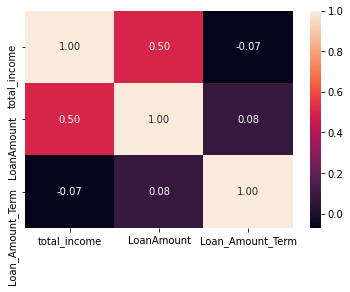

In [128]:
loanDf_imp['total_income']=loanDf_imp['ApplicantIncome']+loanDf_imp['CoapplicantIncome']

loanDf_imp['LoanAmount']=np.log(loanDf_imp['LoanAmount'])

import matplotlib.pyplot as plt
sns.heatmap(loanDf_imp[['total_income','LoanAmount','Loan_Amount_Term']].corr(), annot=True, fmt=".2f")
plt.show()

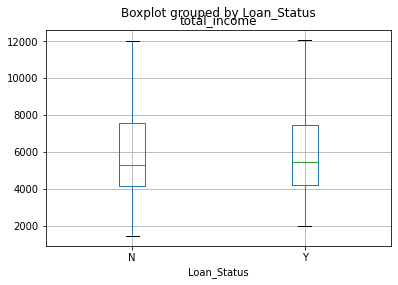

In [129]:
loanDf_imp.boxplot(column='total_income', by='Loan_Status',showfliers=False)
plt.show()

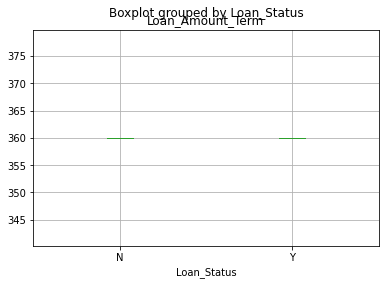

In [130]:
loanDf_imp.boxplot(column='Loan_Amount_Term', by='Loan_Status',showfliers=False)
plt.show()